<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общаяя-информация-о-данных" data-toc-modified-id="Общаяя-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общаяя информация о данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных-" data-toc-modified-id="Предобработка-данных--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных <a id="step2"></a></a></span><ul class="toc-item"><li><span><a href="#Расчет-суммарных-продаж-во-всех-регионах" data-toc-modified-id="Расчет-суммарных-продаж-во-всех-регионах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Расчет суммарных продаж во всех регионах</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-" data-toc-modified-id="Исследовательский-анализ-данных--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных <a id="step3"></a></a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Шаг-4.-Портрет-пользователя-каждого-региона-" data-toc-modified-id="Шаг-4.-Портрет-пользователя-каждого-региона--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Портрет пользователя каждого региона <a id="step4"></a></a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез-" data-toc-modified-id="Проверка-гипотез--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез <a id="step5"></a></a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод-" data-toc-modified-id="Общий-вывод--6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод <a id="step6"></a></a></span></li></ul></div>

# Исследование закономерностей определяющих успешность игры

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (Данные за 2016 год могут быть неполными.) 
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Общаяя информация о данных

Импортируем необходимые для анализа библиотеки. Откроем предоставленный файл и изучим общую информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

Таблица содержит 16715 строк и 11 столбцов. Есть пропущенные значения, неверные форматы столбцов, разный регистр. 

 ## Предобработка данных <a id="step2"></a> 

Проверим пропуски, заменим ошибочные значения, проверим регистр и дубликаты. Проведем, необходимые для дальнейшего анализа, расчеты. 

Заменим названия столбцов(приведем к нижнему регистру). Так же приведем к нижнему регистру названия игр и названия жанров. Платформы оставим без изменения, так как там указаны сокращенные названия.

In [3]:
data.columns = data.columns.str.lower()
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразуем тип данных в столбцах rating и genre на категорию. Это нужно для оптимизации занимаемого места в памяти. 

In [4]:
data['rating'] = data['rating'].astype('category')
data['genre'] = data['genre'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null category
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null category
dtypes: category(2), float64(6), object(3)
memory usage: 1.2+ MB


Столбец user_score (оценка пользователей, максимум 10) должен содержать только числовые значения. Проверим так ли это.

In [5]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец содержит пропущенные значения, а так же значения "tbd", что означает To Be Determined, то есть "Будет определено". Так как самостоятельно определить их мы не сможем, заменим данные значения на NaN. Тип данных ячейки изменим на числовой.

In [6]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null category
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null category
dtypes: category(2), float64(7), object(2)
memory usage: 1.2+ MB


После внесенных изменений значения NaN содержатся в следующих столбцах:

    name               2 пропуска
    year_of_release    269 пропусков
    genre              2 пропуска
    critic_score       8578 пропуска
    user_score         9125 пропусков
    rating             6766 пропусков

Заменить неопределенные значения без потери актуальности информации невозможно. Оставляем все как есть. К тому же, для первых трех столбцов пропуски содержатся менее чем в 2% от общих данных. 

Проверка на дубликаты

In [7]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Таблица пустая, дубликатов не обнаружено.

### Расчет суммарных продаж во всех регионах

Рассчитаем сумарные продаажи во всех регионах и внесем значения в таблицу.

In [8]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

В ходе предобработки данных мы заменили ошибочные значения, регистры и провели проверку на дубликаты. Рассчитан и добавлен в таблицу столбец с общей суммой продаж по регионам. 

 ## Исследовательский анализ данных <a id="step3"></a> 

Рассчитаем сколько игр выпускалось в разные года. Выведем последние 10 лет в таблице, а полностью отобразим на графике.

In [9]:
data_year_count = data.pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'count').reset_index()
data_year_count.tail(10)

,year_of_release,all_sales
27,2007.0,1197
28,2008.0,1427
29,2009.0,1426
30,2010.0,1255
31,2011.0,1136
32,2012.0,653
33,2013.0,544
34,2014.0,581
35,2015.0,606
36,2016.0,502


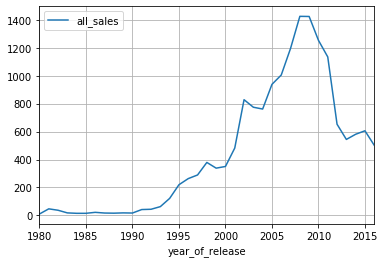

In [10]:
data_year_count.plot(x = 'year_of_release', y = 'all_sales', grid = True)
plt.show()

Как видно из графика и из таблицы в разные временные периоды выпускалось разное количество игр. До 1993 года на графике почти прямая линия, игр выпускалось мало и примерно одинаковое количество из года в год. Начиная с 1995 года начинается рост, пик приходится на 2008-2009 года. Рост обусловлен проникновением цифровых технологий на потребительский рынок. Телевизоры, приставки, персональные компьютеры стали доступны для большего числа людей. Начиная с 2010 года на графике наблюдается снижение к 2011 году, а далее резкий спад к 2012.   Небольшой рост в 2014 и 2015 годах, что скорее всего обусловлено выходом новых приставок на рынок. Данные за 2016 год не полные, возможно поэтому на графике снижение. 

Таким образом актуальным, на данный момент, периодом можно считать данные с 2012 года. 

Выберем топ-10 платформ с наибольшими суммарными продажами и построем распределение по годам.

In [11]:
data_platform_top = data.groupby('platform')['all_sales'].sum().sort_values(ascending = False).reset_index().head(10)
data_platform_top

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Топ-10 определены, сформируем для этих платформ сумарные продажи по годам.

In [12]:
data_platform_sum = data.pivot_table(index = ['platform','year_of_release'], values = 'all_sales', aggfunc = 'sum').reset_index()
data_platform_sum.head(5)

,platform,year_of_release,all_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27


In [13]:
data_platform = data_platform_top.merge(data_platform_sum, on = 'platform', how = 'left')
data_platform.head(5)

,platform,all_sales_x,year_of_release,all_sales_y
0,PS2,1255.77,2000.0,39.17
1,PS2,1255.77,2001.0,166.43
2,PS2,1255.77,2002.0,205.38
3,PS2,1255.77,2003.0,184.31
4,PS2,1255.77,2004.0,211.81


На основании полученной таблицы построим график.

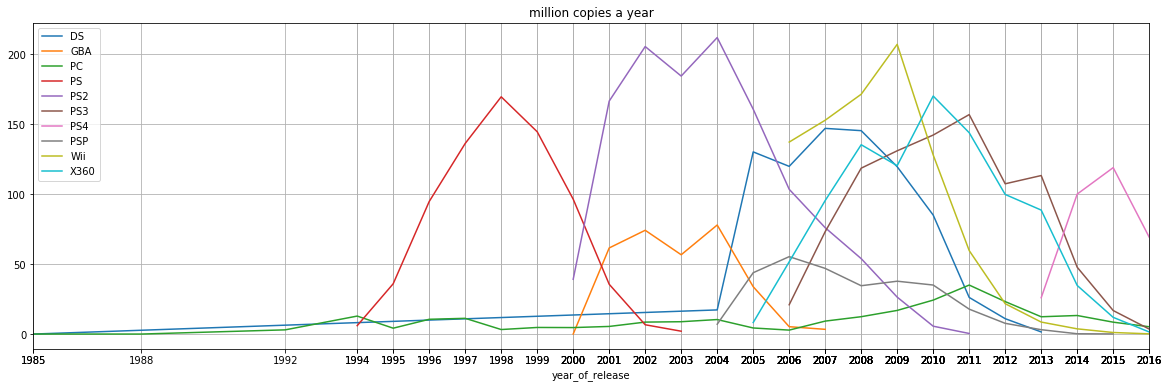

In [14]:
data_platform.set_index('year_of_release', inplace=True)
data_platform.groupby('platform')['all_sales_y'].plot(legend=True, grid = True, figsize = (20,6),title = 'million copies a year')
plt.xticks(data_platform.index.tolist())
plt.legend()
plt.show()

На графике сразу видна ошибка. Приставка Nintendo DS выпушена в 2004 году, и не может быть игры раньше данного года. Значение year_of_release ошибочно.

In [15]:
data.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,strongest tokyo university shogi ds,DS,1985.0,action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Ошибка допушена всего в 1 строке, на наше исследование это не повлияет. 

Как выдно из графика средний "срок жизни" платформы составляет 10 лет. То есть в 2017 году актуальными будут приставки, вышедшие на рынок после 2007 года. 

В 2013 году на рынок вышла новая приставка PS4. На графике виден ее стремительный рост к 2014 году. На фоне роста видно и падение с 2013 на 2014 год продаж игр для приставок X360 и PS3. Исходяя из этого актуальным можно считать период с 2014 года. 

Пиковые значения продаж для платфор составляют 3-5 лет из общего срока жизни. Рост на графике виден только у PS4, и приблизительно высокие продажи должны продлится до 2017-2019 годов включительно.

Таким образом актуальный период для дальнейшего исследования установим с 2014 года.

In [16]:
data_new = data.query('year_of_release >= 2014')
data_new.info()                      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
name               1689 non-null object
platform           1689 non-null object
year_of_release    1689 non-null float64
genre              1689 non-null category
na_sales           1689 non-null float64
eu_sales           1689 non-null float64
jp_sales           1689 non-null float64
other_sales        1689 non-null float64
critic_score       718 non-null float64
user_score         888 non-null float64
rating             940 non-null category
all_sales          1689 non-null float64
dtypes: category(2), float64(8), object(2)
memory usage: 149.2+ KB


Для определения лидирующих по продажам платформ в актуальном периоде, построим график

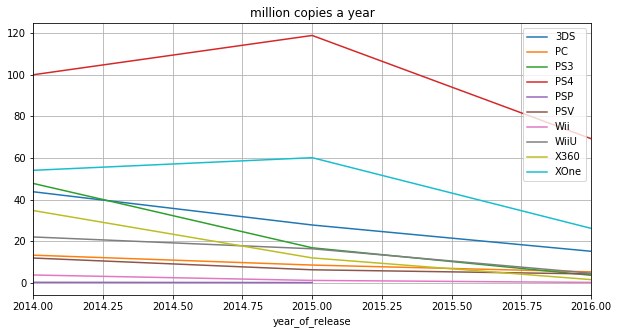

In [17]:
data_new_platform = data_new.pivot_table(index = ['platform','year_of_release'], values = 'all_sales', aggfunc = 'sum').reset_index()
data_new_platform.set_index('year_of_release', inplace=True)
data_new_platform.groupby('platform')['all_sales'].plot(legend=True, grid = True, figsize = (10,5), title = 'million copies a year')
plt.legend()
plt.show()

По графику виден спад в продажах копий с 2015 к 2016 году. Не известно учтены ли в наших данных продажи цифровых копий или только дисковые копии, поэтому спад может означать снижение продаж именно дисковых копий. Так же снижение может быть связано с тем, что данные за 2016 год не полные. 

По итогу 2016 года фаворитами стали: PS4, XOne и 3DS. PS4 и XOne занимают первое и второе место соответсвенно с 2014 года, а nintendo 3DS в 2014 немного уступает PS3. Все остальные платформы по состоянию на 2016 году находятся примерно в одной точке. 

Для более полного понимания рынка, сформируем дополнительно график количества игр для платформ в актуальном периоде.

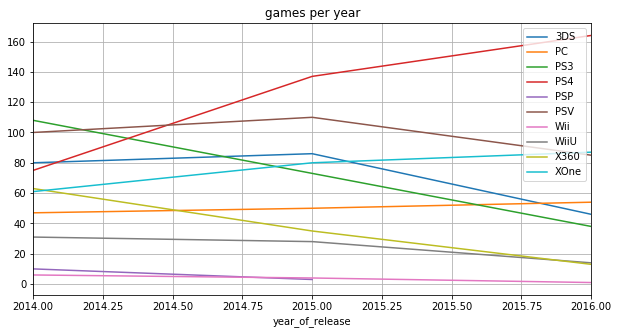

In [18]:
data_new_platform = data_new.pivot_table(index = ['platform','year_of_release'], values = 'all_sales', aggfunc = 'count').reset_index()
data_new_platform.set_index('year_of_release', inplace=True)
data_new_platform.groupby('platform')['all_sales'].plot(legend=True, grid = True, figsize = (10,5), title = 'games per year')
plt.legend()
plt.show()

Данный график значительно отличается от графика "миллион копий в год". В 2014 году в лидерах по по числу выпущенных игр PS3. К 2016 году лидер меняется на PS4. Лидера как по количеству проданых копий, так и по числу выпущенных игр. И на графике виден рост в 2016 году относительно 2015, чего не было на графике "миллион копий в год". Так же растет число игр для PC и XOne. Здесь возможны несколько вариантов, либо выпускались игры, которые не интересны пользователям, либо предположение, что снижение продаж коснулось лишь дисковых копий, верно. 

По данным 2-х графиков оставим для анализа 4 платформы: PS4, XOne и 3DS, лидеров по продажам копий, и PC как стабильную платформу с небольшим ростом. 

In [19]:
data_new_top = data_new.query('platform == "PS4" or platform == "XOne" or platform == "3DS" or platform == "PC" ')
data_new_top.head(5)                              

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,call of duty: black ops 3,PS4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,PS4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014.0,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,fifa 16,PS4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015.0,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [20]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

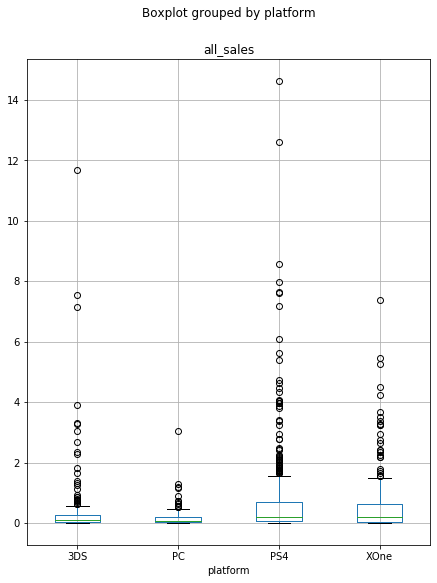

In [21]:
data_new_top.boxplot(column='all_sales',by = 'platform', grid = True, figsize = (7,9))
plt.show()

In [22]:
box_plot = data_new_top.groupby('platform')['all_sales'].describe().reset_index()
box_plot


,platform,count,mean,std,min,25%,50%,75%,max
0,3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
1,PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
2,PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
3,XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


Как видно из графика, большим тиражом расходятся лишь единичные игры. В общей же массе медиана продаж находится на уровне 100-200 тысяч копий в год. Такая тенденция характерна для всех платформ. 

Выясним влияют ли на продажи внутри одной платформы (PS4) отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [23]:
data_new_ps4 = data_new.query('platform == "PS4"')
data_new_ps4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,call of duty: black ops 3,PS4,2015.0,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,grand theft auto v,PS4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,fifa 16,PS4,2015.0,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015.0,shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,call of duty: advanced warfare,PS4,2014.0,shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [24]:
data_analit = data_new_ps4[['all_sales', 'critic_score','user_score']]
data_analit.corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


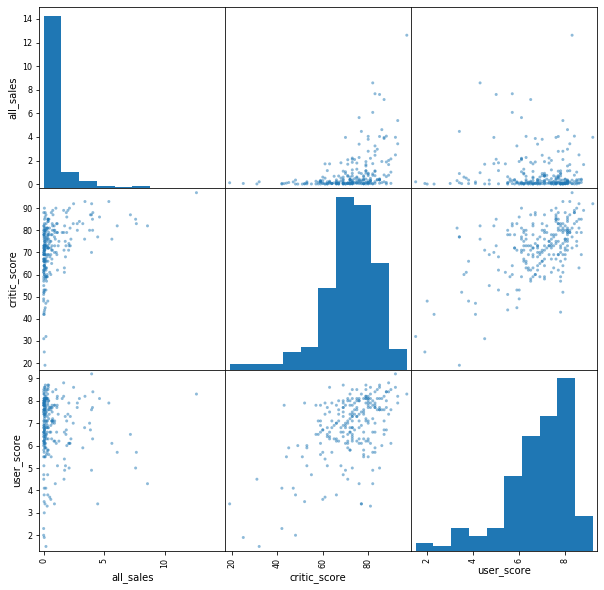

In [25]:
pd.plotting.scatter_matrix(data_analit, figsize = (10,10))
plt.show()

По значениям коэффициентов корреляции, можно говорить о линейной взаимосвязи между critic_score и all_sales, при увеличении оценки увеличивается и количество продаж. По графику же видно, что взаимосвязь этих двух показателей скорее всего не линейная

Высокая линейная взаимосвязь у показателей critic_score и user_score. При росте оценки критиков, растет и оценка пользователей. График подтверждает линейную взаимосвязь.

Взаимосвязи между user_score и all_sales не наблюдается. Это видно и по коэффициенту и по графику. 

Посмотрим какая взаимосвязь есть на других платформах.

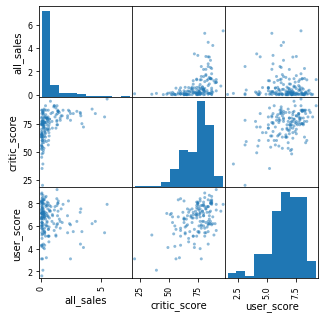

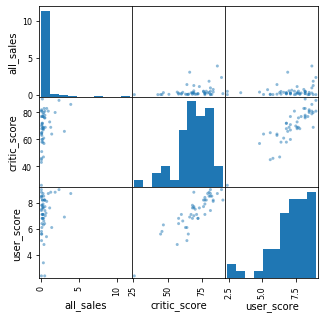

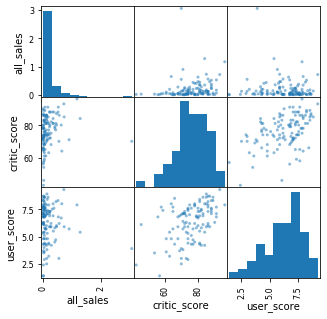

In [26]:
data_analit2 = data_new.query('platform == "XOne"')[['all_sales', 'critic_score','user_score']]
data_analit3 = data_new.query('platform == "3DS"')[['all_sales', 'critic_score','user_score']]
data_analit4 = data_new.query('platform == "PC"')[['all_sales', 'critic_score','user_score']]
pd.plotting.scatter_matrix(data_analit2, figsize = (5,5))
pd.plotting.scatter_matrix(data_analit3, figsize = (5,5))
pd.plotting.scatter_matrix(data_analit4, figsize = (5,5))
plt.show()

По графикам видно что взаимосвязи по другим платформам аналогичны PS4.

Сформируем общее распределение игр по жанрам.

In [27]:
data_new_genre = data_new.groupby('genre')['all_sales'].sum().sort_values(ascending = False)
data_new_genre

genre
action          199.36
shooter         170.94
sports          109.48
role-playing    101.44
misc             37.55
fighting         28.22
racing           27.52
platform         18.09
adventure        17.55
simulation       13.13
strategy          3.96
puzzle            2.21
Name: all_sales, dtype: float64

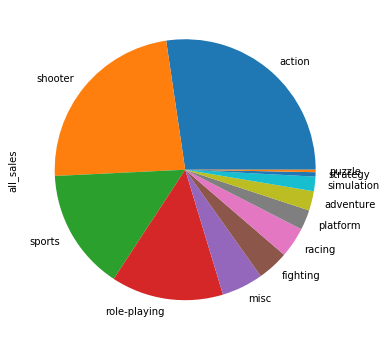

In [28]:
data_new_genre.plot(kind = 'pie', figsize = (6,6))
plt.show()

По количеству проданых копий в разрезе жанров, лидирует жанр action, затем идет shooter, sports и role-playing. По графику видно, что в сумме на их долю приходится больше 3/4 от общего количества проданых игр. Далее группа среднячков (misc, fighting, racing, platform, adventure, simulation). Самыми низкопродаваемыми являются жанры strategy и puzzle. Последний продается почти в 100 раз меньше лидера.

### Вывод

В результате исследовательского анализа был определен актуальный на текущий момент времени период для исследования: 2014-2016 годы. Так как именно в 2014 начался рост продаж игр для новых приставок PS4 и XOne. При средних пиковых значениях 3-5 лет из общего срока жизни платформ, 2017 попадает в этот промежуток.

В актуальном периоде больше всего продается игр на платформы: PS4, XOne,3DS и РС. Роста в количестве проданных копий нет, зато есть в количестве выпущенных игр. Либо выпускались игры, которые не интересны пользователям, либо снижение продаж коснулось лишь дисковых копий.

По настоящему большим тиражом расходятся лишь единичные игры. В общей же массе медиана продаж находится на уровне 100-200 тысяч копий в год. Такая тенденция характерна для всех 4-х платформ.

Между продажами и отзывами критиков есть прямая взаимосвязь(при увеличении оценки увеличивается и количество продаж), которая судя по диаграмме рассеяния нелинейна. Взаимосвязи между отзывы пользователей и продажами не наблюдается. Высокая линейная взаимосвязь у показателей critic_score и user_score. При росте оценки критиков, растет и оценка пользователей или наоборот. Такие взаимосвязи характерны для всех 4-х платформ.

По количеству проданых копий в разрезе жанров, лидирует жанр action, затем идет shooter, sports и role-playing. В сумме на их долю приходится больше 3/4 от общего количества проданых игр.

## Шаг 4. Портрет пользователя каждого региона <a id="step4"></a> 

Для составления портрета пользователя каждого региона (NA, EU, JP) определим топ-5 самых популярных платформ:

In [29]:
data_new_region = data_new.groupby('platform')[['na_sales','eu_sales','jp_sales', 'all_sales']].sum().sort_values(by = 'all_sales', ascending = False)
data_new_region

,na_sales,eu_sales,jp_sales,all_sales
platform,,,,
PS4,98.61,130.04,15.02,288.15
XOne,81.27,46.25,0.32,140.36
3DS,22.64,16.12,44.24,86.68
PS3,22.05,25.54,11.22,68.18
X360,28.30,15.49,0.08,48.22
WiiU,19.36,13.15,7.31,42.98
PC,7.23,17.97,0.00,27.05
PSV,2.52,3.53,14.54,22.40
Wii,2.08,2.59,0.00,5.07


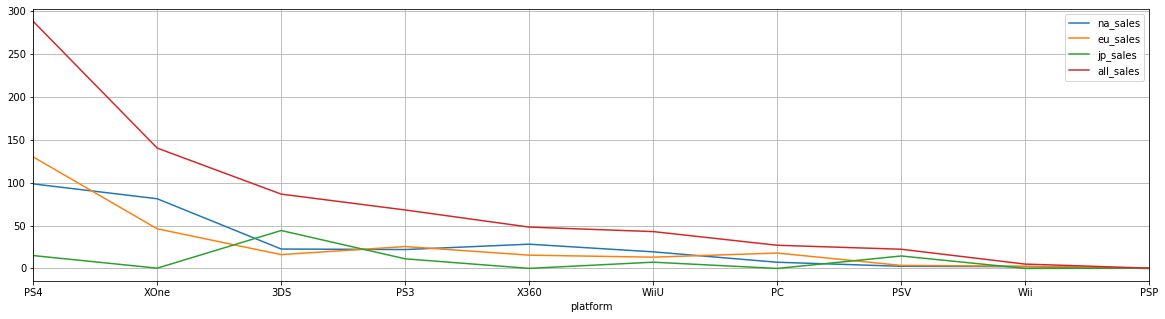

In [30]:
data_new_region.plot(legend=True, grid = True, figsize = (20,5))
plt.show()

В Северной Америке в топ-5 входят: PS4 (примерно треть от общемировых продаж), XOne(больше половины общемировых продаж), X360(больше половины общемировых продаж), 3DS и PS3. В Европе это: PS4(почти половина общемировых продаж), XOne (примерно треть общемировых), PS3 , PC и 3DS. В Японии: 3DS (больше половины общемировых), PS4, PSV(больше половины общемировых), PS3 и WiiU.

Определим самые популярные жанры (топ-5) в разрезе регионов.

In [31]:
data_new_region2 = data_new.groupby('genre')[['na_sales','eu_sales','jp_sales', 'all_sales']].sum().sort_values(by = 'all_sales', ascending = False)
data_new_region2

,na_sales,eu_sales,jp_sales,all_sales
genre,,,,
action,72.53,74.68,29.58,199.36
shooter,79.02,65.52,4.87,170.94
sports,46.13,45.73,3.26,109.48
role-playing,33.47,28.17,31.16,101.44
misc,15.05,12.86,5.61,37.55
fighting,12.43,6.69,6.37,28.22
racing,8.74,14.13,1.76,27.52
platform,6.79,6.80,2.69,18.09
adventure,5.64,6.49,3.60,17.55


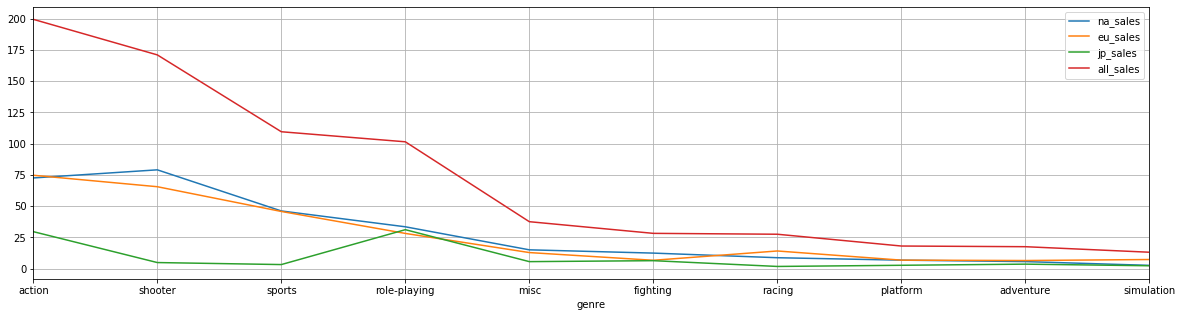

In [32]:
data_new_region3 = data_new_region2.head(10)
data_new_region3.plot(legend=True, grid = True, figsize = (20,5))
plt.show()

В Северной Америке в топ-5 входят: shooter(чуть меньше половины общемировых продаж),action(примерно треть от общемировых продаж),  sports(меньше половины общемировых продаж), role-playing и misc	В Европе: action (больше трети от общемировых продаж), shooter (больше трети от общемировых продаж), sports (меньше половины общемировых продаж), role-playing и racing	. В Японии: role-playing (немного меньше трети от общемировых продаж), action, fighting, misc и shooter, при этом последние три в разы отстают от первых 2-х.

Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Классификация игр по рейтингу ESRB:

    «E» («Everyone») — «Для всех»
    «E10+» («Everyone 10 and older») — «Для всех старше 10 лет» 
    «T» («Teen») — «Подросткам 13—19 лет»
    «M» («Mature») — «От 17 лет»

In [33]:
data_new_region4 = data_new.groupby('rating')[['na_sales','eu_sales','jp_sales', 'all_sales']].sum().sort_values(by = 'all_sales', ascending = False)
data_new_region4

,na_sales,eu_sales,jp_sales,all_sales
rating,,,,
M,96.42,93.44,8.01,226.54
E,50.74,58.06,8.94,133.13
T,38.95,34.07,14.78,99.13
E10+,33.23,26.16,4.46,71.68
AO,0.00,0.00,0.00,0.00
EC,0.00,0.00,0.00,0.00
K-A,0.00,0.00,0.00,0.00
RP,0.00,0.00,0.00,0.00


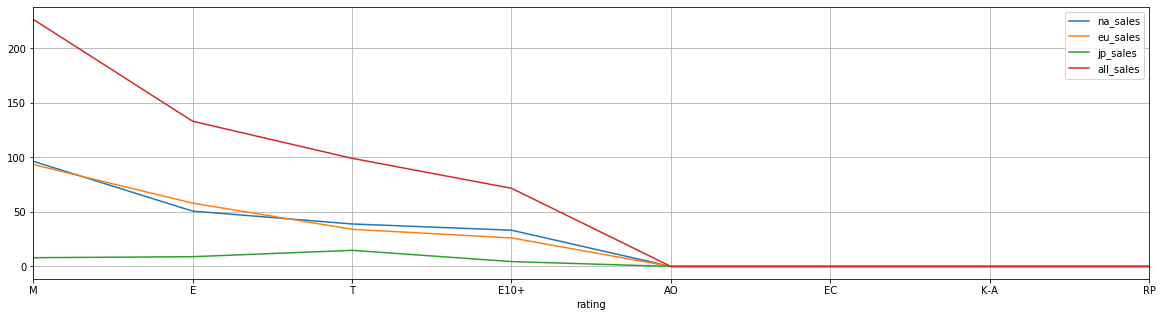

In [34]:
data_new_region4.plot(legend=True, grid = True, figsize = (20,5))
plt.show()

В Северной Америке больше всего продается игр с рейтингом M (немного меньше половины от продаж во всем мире), на втором месте E.
В Европе аналогично Северной Америке, первое место M , на втором месте E (немного меньше половины от продаж во всем мире). В Японии на первом месте T, далее с небольшим разрывом E и M.

### Вывод

По данным анализа можно сформировать 3 портрета пользователя для каждого региона:

Северная Америка (NA) - Игрок от 17 лет, играет на PS4 или XOne, в жанры shooter или action.

Европа(EU) - Игрок от 17 лет, играет на PS4, в жанры action или shooter.

Япония(JP) - Игрок 13-17 лет, предпочитающий портативные игровые устройства 3DS и PSV и жанры role-playing и action.

## Проверка гипотез <a id="step5"></a> 

Проверим гипотезу, о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Рассчитаем средний пользовательский рейтинг платформ.

In [35]:
xbox = data_new.query('platform == "XOne"')
x = xbox['user_score'].mean()
print('Средний пользовательский рейтинг платформы Xbox: {:.2f}'.format(x))
pc = data_new.query('platform == "PC"')
p = pc['user_score'].mean()
print('Средний пользовательский рейтинг платформы PC: {:.2f}'.format(p))

Средний пользовательский рейтинг платформы Xbox: 6.59
Средний пользовательский рейтинг платформы PC: 6.30


Построим гистограмму частот. 

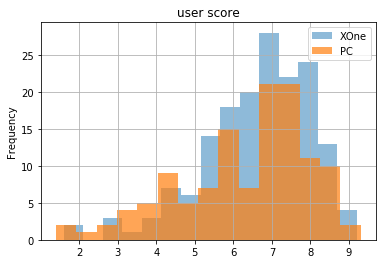

In [36]:
a4 = xbox['user_score'].plot(kind = 'hist',  grid = True, alpha = 0.5, bins = 15, label = 'XOne') 
pc['user_score'].plot(kind = 'hist', grid = True, ax = a4, alpha = 0.7,bins = 15, label = 'PC', title = 'user score')
plt.legend()
plt.show()

Сформулируем нулевую гипотезу: Предположим что различий между средним пользовательским рейтингом платформы Xbox и платформы PC нет. Тогда альтернативной гипотезой будет: Средний пользовательский рейтинг платформ Xbox и PC различается.
Для рассчета p уровня значимости данной гипотезы воспользуемся Т-тестом. Предварительно рассчитаем дисперсии.

In [37]:
var_XOne = np.var(xbox['user_score'],ddof = 1)
var_PC = np.var(pc['user_score'],ddof = 1)
print('Дисперсия платформы Xbox равна: {:.2f}'.format(var_XOne))
print('Дисперсия платформы PC равна: {:.2f}'.format(var_PC))

Дисперсия платформы Xbox равна: 1.89
Дисперсия платформы PC равна: 2.90


По условиям Т-теста, желательно что бы дисперсии внутри групп были примерно равны. У нас этого нет, укажем это в параметре теста. Пороговое значение для p зададим 0,05

In [38]:
alpha = 0.05
results = st.ttest_ind(xbox['user_score'], pc['user_score'], nan_policy = 'omit', equal_var = False) 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668985
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось, то есть значимых статистических различий между средним пользовательским рейтингом платформы Xbox и платформы PC нет

Проверим еще одну гипотезу. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Рассчитаем средний пользовательский рейтинг жанров.

In [39]:
a = data_new.query('genre == "action"')['user_score'].mean()
print('Средний пользовательский рейтинг жанра Action: {:.2f}'.format(a))
s = data_new.query('genre == "sports"')['user_score'].mean()
print('Средний пользовательский рейтинг жанра Sports: {:.2f}'.format(s))

Средний пользовательский рейтинг жанра Action: 6.76
Средний пользовательский рейтинг жанра Sports: 5.23


Построим гистограмму частот. 

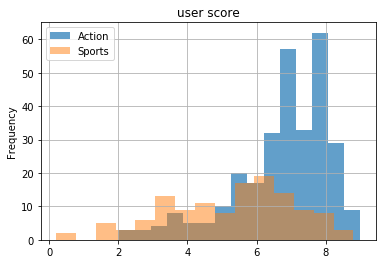

In [40]:
a5 = data_new.query('genre == "action"')['user_score'].plot(kind = 'hist',  grid = True, alpha = 0.7, bins = 15, label = 'Action') 
data_new.query('genre == "sports"')['user_score'].plot(kind = 'hist', grid = True, ax = a5, alpha = 0.5,bins = 15, label = 'Sports', title = 'user score')
plt.legend()
plt.show()

Сформулируем нулевую гипотезу: Предположим что различий между средним пользовательским рейтингом жанров Action и Sports нет. Тогда альтернативной гипотезой будет: Средний пользовательский рейтинг жанров Action и Sports различается.
Для рассчета p уровня значимости данной гипотезы воспользуемся Т-тестом. Предварительно рассчитаем дисперсии.

In [41]:
var_Action = np.var(data_new.query('genre == "action"')['user_score'],ddof = 1)
var_Sports = np.var(data_new.query('genre == "sports"')['user_score'],ddof = 1)
print('Дисперсия жанра Action равна: {:.2f}'.format(var_Action))
print('Дисперсия жанра Sports равна: {:.2f}'.format(var_Sports))

Дисперсия жанра Action равна: 1.90
Дисперсия жанра Sports равна: 3.45


По условиям Т-теста, желательно что бы дисперсии внутри групп были примерно равны. У нас этого нет, укажем это в параметре теста. Пороговое значение для p зададим 0,05

In [42]:
alpha = 0.05
results = st.ttest_ind(data_new.query('genre == "action"')['user_score'], data_new.query('genre == "sports"')['user_score'] , nan_policy = 'omit', equal_var = False) 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644845e-14
Отвергаем нулевую гипотезу


По результатам Т-теста, мы отвергли нулевую гипотезу, значит с вероятностью 95% средние пользовательские рейтинги жанров Action и Sports различаются.

### Вывод

По расчетам средний пользовательский рейтинг платформы Xbox 6.59, платформы PC 6.30, но данная разница статистически не значима, то есть с вероятностью 95% значимых статистических различий нет.

По расчетам средний пользовательский рейтинг жанра Action 6.76, жанра Sports 5.23, и с вероятностью 95% эта разница значима.

## Общий вывод <a id="step6"></a> 

Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, по данным из открытых источников о продажах игр, оценки пользователей и экспертов было проведено исследование определяющих успешность игры закономерностей. Что бы в дальнейшем сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Предварительно была проведена подготовка данных. Обнаружены и устранены лишние и выбивающиеся значения, преобразованы форматы данных, произведена проверка на дубликаты.

В ходе исследовательского анализаа данных получены следующие результаты: 

Был определен актуальный на текущий момент времени период для исследования: 2014-2016 годы. Так как именно в 2014 начался рост продаж игр для новых приставок PS4 и XOne. При средних пиковых значениях 3-5 лет из общего срока жизни платформ, 2017 попадает в этот промежуток.

В актуальном периоде больше всего продается игр на платформы: PS4, XOne,3DS и РС. Роста в количестве проданных копий нет, зато есть в количестве выпущенных игр. Либо выпускались игры, которые не интересны пользователям, либо снижение продаж коснулось лишь дисковых копий.

По настоящему большим тиражом расходятся лишь единичные игры. В общей же массе медиана продаж находится на уровне 100-200 тысяч копий в год. Такая тенденция характерна для всех 4-х платформ.

Между продажами и отзывами критиков есть прямая взаимосвязь(при увеличении оценки увеличивается и количество продаж), которая судя по диаграмме рассеяния нелинейна. Взаимосвязи между отзывы пользователей и продажами не наблюдается. Высокая линейная взаимосвязь у показателей critic_score и user_score. При росте оценки критиков, растет и оценка пользователей или наоборот. Такие взаимосвязи характерны для всех 4-х платформ.

По количеству проданых копий в разрезе жанров, лидирует жанр action, затем идет shooter, sports и role-playing. В сумме на их долю приходится больше 3/4 от общего количества проданых игр.

Далее было произведено сегментирование по географическому признаку и определен портрет пользователя по каждому региону:

Северная Америка (NA) - Игрок от 17 лет, играет на PS4 или XOne, в жанры shooter или action.

Европа(EU) - Игрок от 17 лет, играет на PS4, в жанры action или shooter.

Япония(JP) - Игрок 13-17 лет, предпочитающий портативные игровые устройства 3DS и PSV и жанры role-playing и action.

В ходе проверки гипотез было выявлено, что средний пользовательский рейтинг платформы Xbox и платформы PC не имеет значимых статистических различий. А пользовательский рейтинг жанра Action значимо отличается от жанра Sports. Стоить дополнительно проверить те же гипотезы, но  

Что бы спланировать рекламную кампанию на 2017 год, необходимо адаптировать ее под разные регионы продаж компьютерных игр. То что имеет успех в Северной Америке, не всегда пользуется спросом в Японии. Портреты пользователей по каждому региону описаны выше. 

Отзывы критиков прямо влияют на продажи. Необходимо проверить имеет ли статистическую значимость различия рейтинга критиков на разных платформах и жанрах. И дополнительно проверить не имеет ли более сильное воздействие взаимосвязь факторов оценка критиков + оценка пользователей. 

Только некоторые игры расходят огромным тиражом, что бы сделать ставку на них, и определить факторы их популярности рекомендуется провести дополнительное исследование. 